In [1]:
from pathlib import Path
from ipywidgets import Output, Button, Layout, HBox
from IPython.display import Image, display, clear_output
import matplotlib.pyplot as plt
import skimage.io as skio
from collections import OrderedDict
import os
import numpy as np
import random
import matplotlib
import csv
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [15, 15]

In [2]:
def store_action_and_label(button: Button) -> None:
    """Annotates the current image with the button's description."""
    global actions, position, save_dir, image, labels_csv

    # store the assigned label
    save_name = save_dir + os.path.basename(images[position])

    print(os.path.basename(images[position]))

    row = [os.path.basename(images[position]), button.description]
    append_list_as_row(labels_csv, row)

    skio.imsave(save_name, image)
    actions[position] = save_name

    # move to next image
    next_image()

def next_image(*args) -> None:
    """Select the next image and update the displays."""
    global position_list, image, position

    # update position
    try:
        old_pos = np.where(position_list == position)[0][0]
        position_list = np.delete(position_list, old_pos)
        new_position_index = random.choice(np.arange(position_list.shape[0]))

        
        position = position_list[new_position_index]

        
        # refresh display
        image = skio.imread(images[position])
        with frame:
            clear_output(wait=True)
            plt.imshow(image, cmap="hot")
            plt.show()
    except:
        print(position)
        print(np.where(position_list == position))

def undo(*args) -> None:
    global actions, position, image, position_list, labels_csv
    if not len(actions) == 0:

        df = pd.read_csv(labels_csv)
  
        df = df.iloc[:-1]
        df.to_csv(labels_csv, index=False)
        
        last_action = actions.popitem()
        position = last_action[0]
        position_list = np.insert(position_list, position, position)
        os.remove(last_action[1])

        image = skio.imread(images[position])
        with frame:
            clear_output(wait=True)
            plt.imshow(image, cmap="hot")
            plt.show()

def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = csv.writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [3]:
# store list of available class labels
classes = ["moult", "no_moult"]

save_dir = "/home/spsalmon/detect_moults/classify_moults/classification_database/whole_database/"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

labels_csv = "/home/spsalmon/detect_moults/classify_moults/classification_database/whole_database/labels.csv"

file = open(labels_csv, 'a+', newline='')

if os.stat(labels_csv).st_size == 0:
    header = ['img_id', 'label']
    append_list_as_row(labels_csv, header)

file.close()

path_images = "/mnt/external.data/TowbinLab/spsalmon/moult_database/fluo/"
images = [os.path.join(path_images, x) for x in sorted(os.listdir(path_images))]
# set up empty dict for labels and initial position
actions = OrderedDict()

position_list = np.arange(len(images))
position = 1000

In [4]:
image = skio.imread(images[position])
frame = Output(layout=Layout(height="1000px", max_width="1000px"))
with frame:
    # display(image)
    plt.imshow(image, cmap = "hot")
    plt.show()

class_buttons = []
for label in classes:
    label_button = Button(description=label)
    label_button.on_click(store_action_and_label)
    class_buttons.append(label_button)

next_button = Button(description="NEXT")
next_button.on_click(next_image)
class_buttons.append(next_button)

undo_button = Button(description="UNDO")
undo_button.on_click(undo)
class_buttons.append(undo_button)

display(frame)
# display(HBox(navigation_buttons))
display(HBox(class_buttons))

Output(layout=Layout(height='1000px', max_width='1000px'))

In [5]:
print(len(actions))
print(position_list.shape)
print(position_list)
print(position)
print(np.where(position_list==position))
print(actions)

0
(44770,)
[    0     1     2 ... 44767 44768 44769]
1000
(array([1000]),)
OrderedDict()


In [6]:
df = pd.read_csv(labels_csv)
print(df)

Empty DataFrame
Columns: [img_id, label]
Index: []


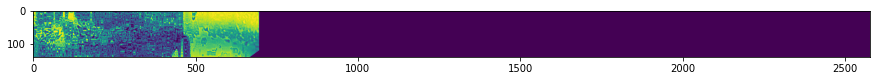

In [7]:
plt.imshow(skio.imread("/home/spsalmon/classify_orientation/classification_database/whole_database/Time00001_Point0022_Channel546 nm,477 nm,DIA_Seq0274.tiff"))

In [8]:
labels = sorted(['error', 'left', 'right'])

y = np.arange(len(labels))
one_hot_labels = np.eye(len(labels), dtype='uint8')[y]
print(one_hot_labels[labels.index('error')])



[1 0 0]
